In [1]:
print('What\'s up?')

What's up?


# Notebook Imports

In [2]:
import pandas as pd

# Constants

In [3]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
SPAM_CAT = 1
HAM_CAT = 0

DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'

# Reading Files

In [4]:
stream = open(EXAMPLE_FILE, encoding='latin-1')
message = stream.read()
stream.close()

print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [5]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [6]:
print(type(message))

<class 'str'>


In [7]:
stream1= open(EXAMPLE_FILE, encoding='latin-1')
is_body1 = False
lines1 = []

for line in stream1:
    if is_body1:
        lines1.append(line)
    elif line == '\n':
        is_body1 = True



email_body1 = '\n'.join(lines1)
stream1.close()
print(email_body1)





Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator Functions

In [8]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [9]:
list(generate_squares(4))

[0, 1, 4, 9]

In [10]:
for i in generate_squares(4):
    print(i, end='->')

0->1->4->9->

In [11]:
list(map(lambda x : x**2, [0,1,2,3]))

[0, 1, 4, 9]

In [12]:
list(filter(lambda  x: x%2==0 , [0,1,2,3]))

[0, 2]

# Email body extraction

In [13]:
from os import walk
from os.path import join

In [14]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')
            
            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)
            yield file_name, email_body

        

In [15]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [16]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [17]:
spam_emails.shape

(1898, 2)

In [18]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = spam_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
print(ham_emails.shape)
ham_emails.head()

(3298, 2)


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [19]:
data = pd.concat([spam_emails, ham_emails])
print('Shape of entire dataframe is', data.shape)
data.head()

Shape of entire dataframe is (5196, 2)


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [20]:
data.tail()

,MESSAGE,CATEGORY
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0


# Data Cleaning: Checking for Missing Values

In [21]:
# Check if any message bodies are null
data.MESSAGE.isnull().values.any()

False

In [22]:
data.MESSAGE.isnull().sum()

0

In [23]:
my_var = None
type(my_var)

NoneType

In [24]:
# Wrong Method to Check Empty but non-None emails
data.MESSAGE.any() == 0

False

In [25]:
# Correct Method
(data.MESSAGE.str.len() == 0).any()

True

In [26]:
(data.MESSAGE.str.len() == 0).sum()

4

### Locate empty emails

In [27]:
type((data.MESSAGE.str.len() == 0))

pandas.core.series.Series

In [28]:
data[(data.MESSAGE.str.len() == 0)].index

Index(['cmds', 'cmds', 'cmds', 'cmds'], dtype='object')

In [29]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

# Remove System File Entries from Dataframe

In [30]:
data.drop(['cmds'], inplace=True)

In [31]:
data.shape

(5192, 2)

# Add Document IDs to track Emails in Dataset

In [32]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [33]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5187
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5188
01398.169b51731fe569f42169ae8f948ec676    5189
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5190
01400.f897f0931e461e7b2e964d28e927c35e    5191
Name: DOC_ID, Length: 5192, dtype: int32

In [34]:
data['FILE_NAME'] = data.index
data = data.set_index('DOC_ID')
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [35]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5187,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5188,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5189,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5190,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5191,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


# Save to File using Pandas

In [36]:
data.to_json(DATA_JSON_FILE)

# Number of Spam Messages Visualised (Pie Chart)

In [37]:
data.CATEGORY.value_counts()

1    3792
0    1400
Name: CATEGORY, dtype: int64

In [38]:
amount_of_spam = data.CATEGORY.value_counts()[0]
amount_of_ham= data.CATEGORY.value_counts()[1]

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

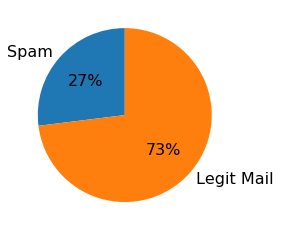

In [40]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]

plt.pie(sizes, labels=category_names, textprops={'fontsize': 16}, startangle = 90, autopct = '%1.0f%%')
plt.show()

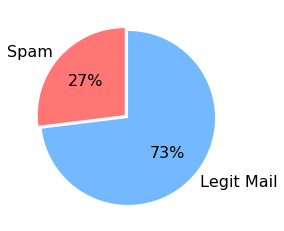

In [41]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#74b9ff']
plt.pie(sizes, labels=category_names, textprops={'fontsize': 16}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, explode = [0, 0.05])
plt.show()

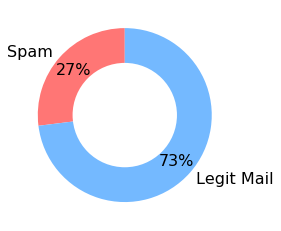

In [49]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#74b9ff']
plt.pie(sizes, labels=category_names, textprops={'fontsize': 16}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, pctdistance=0.79)

# draw circle
center_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(center_circle)

plt.show()

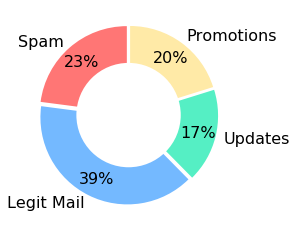

In [54]:
category_names = ['Spam', 'Legit Mail', 'Updates', 'Promotions']
sizes = [25, 43, 19, 22]
custom_colors = ['#ff7675', '#74b9ff', '#55efc4', "#ffeaa7"]
offset = [0.03, 0.03, 0.03, 0.03]
plt.pie(sizes, labels=category_names, textprops={'fontsize': 16}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, pctdistance=0.79, explode = offset)

# draw circle
center_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(center_circle)

plt.show()

# Natural Language Processing

### Text Pre-Processing

In [55]:
# Convert to Lower Case
msg = 'All work an no play makes a Jack a dull boy.'
msg.lower()

'all work an no play makes a jack a dull boy.'

### Download the NLTK Resources (Tokenizer & Stopwords)

In [74]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rasoul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rasoul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Tokenising 

In [59]:
msg = 'All work an no play makes a Jack a dull boy.'
word_tokenize(msg.lower())

['all',
 'work',
 'an',
 'no',
 'play',
 'makes',
 'a',
 'jack',
 'a',
 'dull',
 'boy',
 '.']

## Removing Stop Words

In [65]:
stop_words = set(stopwords.words('english'))

In [68]:
if 'hello' in stop_words: print("Found it!")

In [70]:
msg = 'All work an no play makes a Jack a dull boy. To be or not to be.'
words = word_tokenize(msg.lower())

filtered_words = []

for word in words:
    if word not in stop_words:
        filtered_words.append(word)
    else:
        continue

filtered_words

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']

## Word Stems and Stemming

In [75]:
msg = 'All work an no play makes a Jack a dull boy. To be or not to be. \
Nobody expects the spanish Inquisition hidtonision!'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english')

filtered_words = []

for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
    else:
        continue

filtered_words

['work',
 'play',
 'make',
 'jack',
 'dull',
 'boy',
 '.',
 '.',
 'nobodi',
 'expect',
 'spanish',
 'inquisit',
 'hidtonis',
 '!']

## Removing Punctuation

In [78]:
msg = 'All work an no play makes a Jack a dull boy. To be or not to be. ??? \
Nobody expects the spanish Inquisition ww!ww hidtonision!'
words = word_tokenize(msg.lower())

stemmer = SnowballStemmer('english')
filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
    else:
        continue

filtered_words

['work',
 'play',
 'make',
 'jack',
 'dull',
 'boy',
 'nobodi',
 'expect',
 'spanish',
 'inquisit',
 'ww',
 'ww',
 'hidtonis']

## Removing HTML tags from Emails

In [86]:
from bs4 import BeautifulSoup

In [85]:
data.at[100, 'MESSAGE']

'<html>\n\n<head>\n\n<title>Digital Publishing Tools - Free Software Alert!</title>\n\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\n\n</head>\n\n<body bgcolor="#FFFFFF" text="#000000">\n\n<center>\n\n<table width="582" border="2" cellspacing="0" cellpadding="5" bordercolor="#0077CC">\n\n<tr>\n\n<td colspan="3" width="582" align="center" bgcolor="#0077CC"><!5122qHWL1-032pyeM4045IIgM3-001oYhw0942jQSK5-726UDqG9283lEHR8-145EiGhl64>\n\n<a href="http://3dpageturningebook.com" style="text-decoration:none;">\n\n<b><font face="Verdana, Arial, Helvetica, sans-serif" size="4" color="#FFFFFF">Publish Like a Professional with Digital Publishing Tools</font></b>\n\n</a>\n\n</td>\n\n</tr>\n\n\n\n<tr>\n\n<td colspan="1" width="204" valign="top">\n\n<b><font face="Verdana Arial, Helvetica, sans-serif" color="#000066" size="2">Easily Create Professional:</font></b>\n\n<font face="Verdana, Arial, Helvetica, sans-serif" size="1" color="#000066">\n\n<ul>\n\n<li>eBooks</li>\n\n<

In [88]:
soup = BeautifulSoup(data.at[100, 'MESSAGE'], 'html.parser')
soup

<html>
<head>
<title>Digital Publishing Tools - Free Software Alert!</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
</head>
<body bgcolor="#FFFFFF" text="#000000">
<center>
<table border="2" bordercolor="#0077CC" cellpadding="5" cellspacing="0" width="582">
<tr>
<td align="center" bgcolor="#0077CC" colspan="3" width="582"><!--5122qHWL1-032pyeM4045IIgM3-001oYhw0942jQSK5-726UDqG9283lEHR8-145EiGhl64-->
<a href="http://3dpageturningebook.com" style="text-decoration:none;">
<b><font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="4">Publish Like a Professional with Digital Publishing Tools</font></b>
</a>
</td>
</tr>
<tr>
<td colspan="1" valign="top" width="204">
<b><font color="#000066" face="Verdana Arial, Helvetica, sans-serif" size="2">Easily Create Professional:</font></b>
<font color="#000066" face="Verdana, Arial, Helvetica, sans-serif" size="1">
<ul>
<li>eBooks</li>
<li>eBrochures</li>
<li>eCatalogs</li>
<li>Resumes</li>
<li>Newslette

In [90]:
print(soup.prettify())

<html>
 <head>
  <title>
   Digital Publishing Tools - Free Software Alert!
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <center>
   <table border="2" bordercolor="#0077CC" cellpadding="5" cellspacing="0" width="582">
    <tr>
     <td align="center" bgcolor="#0077CC" colspan="3" width="582">
      <!--5122qHWL1-032pyeM4045IIgM3-001oYhw0942jQSK5-726UDqG9283lEHR8-145EiGhl64-->
      <a href="http://3dpageturningebook.com" style="text-decoration:none;">
       <b>
        <font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="4">
         Publish Like a Professional with Digital Publishing Tools
        </font>
       </b>
      </a>
     </td>
    </tr>
    <tr>
     <td colspan="1" valign="top" width="204">
      <b>
       <font color="#000066" face="Verdana Arial, Helvetica, sans-serif" size="2">
        Easily Create Professional:
       </font>
      </b>
      <font color="#0

In [91]:
soup.get_text()

'\n\nDigital Publishing Tools - Free Software Alert!\n\n\n\n\n\n\n\n\nPublish Like a Professional with Digital Publishing Tools\n\n\n\n\n\nEasily Create Professional:\n\n\neBooks\neBrochures\neCatalogs\nResumes\nNewsletters\nPresentations\nMagazines\nPhoto Albums\nInvitations\nMuch, much more\n\n\n\n\nSave MONEY! - Save Trees\n\n\n\n\nSave on Printing, Postage and Advertising Costs\n\n\n\nDIGITAL PUBLISHING TOOLS\n\n\nDOWNLOAD NEW FREE Version NOW!\n\n\n*Limited Time Offer\n\n\nChoose from these\n\nDisplay Styles:\n\n\n3D Page Turn\nSlide Show\nSweep/Wipe\n\n\nEmbed hyperlinks and Link to anywhere Online, \n\n\n\nsuch as your Website, Order Page or Contact Form.\n\n\n\n\nDistribute via Floppy, CD-ROM, E-Mail or Online.\n\n\n\n\n\n\n\nTake your Marketing to the Next Level!\n\n\n\n\n\n\nFor More Info, Samples or a FREE Download, click the appropriate link to the right! \xa0\n\nServer demand is extremely high for this limited time Free Software offer. \xa0\n\nPlease try these links period

## Functions for Email Processing

In [97]:
def clean_message(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
    
    #Remove HTML Tags
    
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    
    # Converts to Lower Case ans Splits Up the Words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        #Removes the Stop Words and Punctuations
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [98]:
clean_message(email_body1)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [99]:
clean_message(data.at[100, 'MESSAGE'])

['digit',
 'publish',
 'tool',
 'free',
 'softwar',
 'alert',
 'publish',
 'like',
 'profession',
 'digit',
 'publish',
 'tool',
 'easili',
 'creat',
 'profession',
 'ebook',
 'ebrochur',
 'ecatalog',
 'resum',
 'newslett',
 'present',
 'magazin',
 'photo',
 'album',
 'invit',
 'much',
 'much',
 'save',
 'money',
 'save',
 'tree',
 'save',
 'print',
 'postag',
 'advertis',
 'cost',
 'digit',
 'publish',
 'tool',
 'download',
 'new',
 'free',
 'version',
 'time',
 'offer',
 'choos',
 'display',
 'style',
 'page',
 'turn',
 'slide',
 'show',
 'emb',
 'hyperlink',
 'link',
 'anywher',
 'onlin',
 'websit',
 'order',
 'page',
 'contact',
 'form',
 'distribut',
 'via',
 'floppi',
 'onlin',
 'take',
 'market',
 'next',
 'level',
 'info',
 'sampl',
 'free',
 'download',
 'click',
 'appropri',
 'link',
 'right',
 'server',
 'demand',
 'extrem',
 'high',
 'limit',
 'time',
 'free',
 'softwar',
 'offer',
 'pleas',
 'tri',
 'link',
 'period',
 'site',
 'seem',
 'slow',
 'unreach',
 'websit',
 'web

# Apply Cleaning and Tokenisation to all Messages

### Slicing DataFrames and Series & Creating Subsets

In [104]:
data.iat[2,0]

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

In [106]:
data.iloc[5:11]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997
10,Cellular Phone Accessories All At Below Wholes...,1,00011.61816b9ad167657773a427d890d0468e


In [112]:
first_emails = data.MESSAGE.iloc[0:3]
nested_list = first_emails.apply(clean_message)

In [113]:
flat_list = []
for sublist in nested_list:
    for item in sublist:
        flat_list.append(item)
        
len(flat_list)

192

In [115]:
flat_list = [item for sublist in nested_list for item in sublist]
flat_list

['save',
 'life',
 'insur',
 'spend',
 'life',
 'quot',
 'save',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'rate',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',
 'us',
 'help',
 'get',
 'start',
 'best',
 'ue',
 'countri',
 'new',
 'coverag',
 'save',
 'hundr',
 'even',
 'usand',
 'dollar',
 'request',
 'free',
 'quot',
 'lifequot',
 'save',
 'servic',
 'take',
 'less',
 'minut',
 'complet',
 'shop',
 'compar',
 'save',
 'type',
 'life',
 'insur',
 'click',
 'free',
 'quot',
 'protect',
 'famili',
 'best',
 'invest',
 'r',
 'make',
 'receipt',
 'email',
 'error',
 'wish',
 'remov',
 'list',
 'pleas',
 'click',
 'type',
 'remov',
 'resid',
 'state',
 'prohibit',
 'solicit',
 'ce',
 'pleas',
 'disregard',
 'email',
 'fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'ch

In [116]:
%%time
# use apply() on all the messages in the DataFrame
nested_list = data.MESSAGE.apply(clean_message)

Wall time: 1min 1s
